# Master M2 MVA 2018/2019 - Graphical models - HWK 2

## Louis GUO, Laurent LIN

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(1)

import tools.Dataset as dt
import models.KMeansClustering as KMeans
import models.EMGaussian as EMG

In [2]:
data = dt.Dataset()

# K-means clustering

In [3]:
np.random.seed(3)

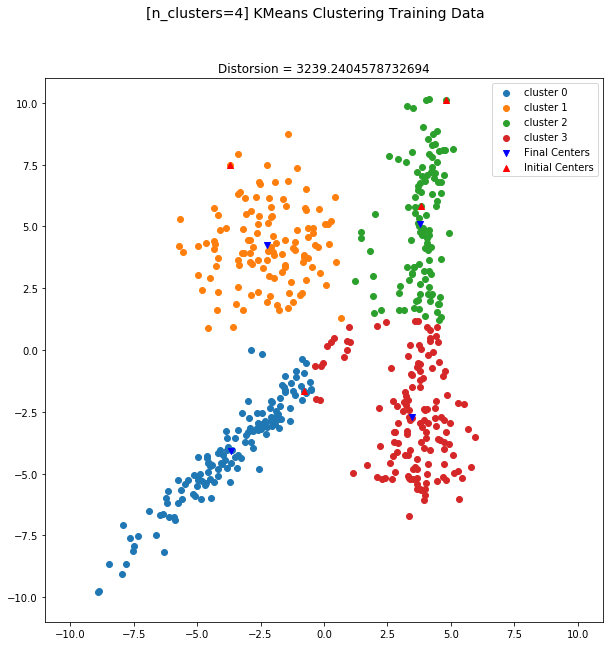

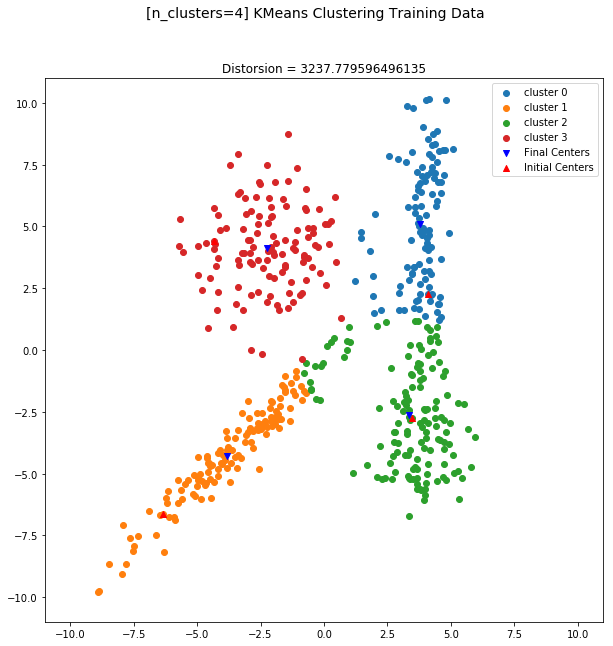

In [4]:
for i in range(2):
    model = KMeans.KMeansClustering(n_clusters=4, max_iter=1000, tol=1e-5, init_mode = "kmpp")
    model.fit(data.X_train)
    model.plot_clusters()

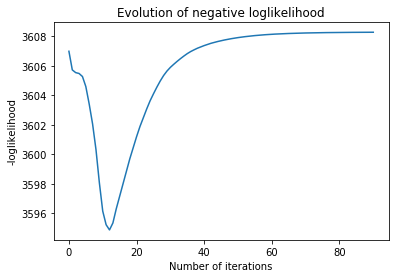

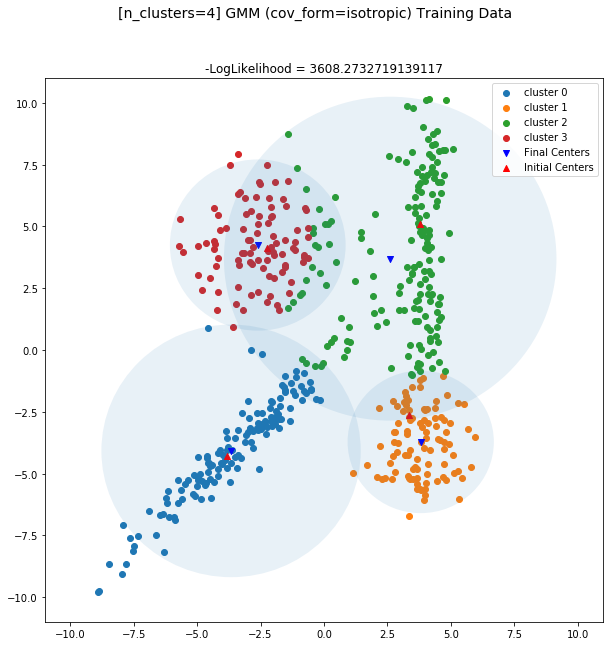

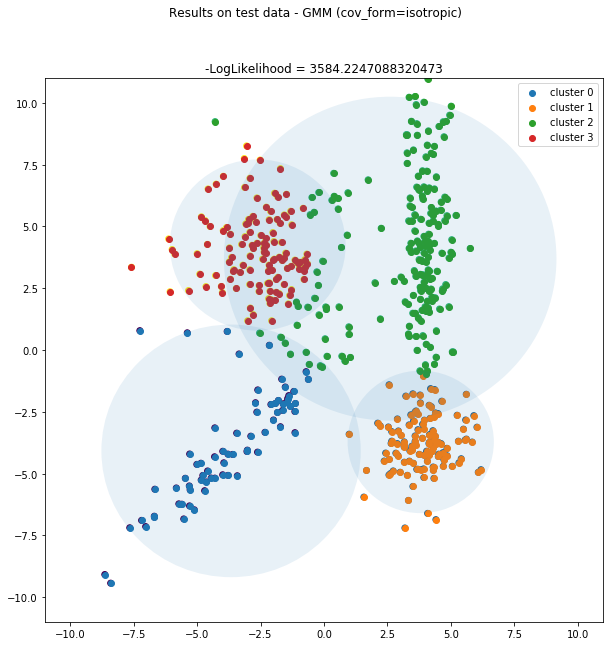

In [44]:
np.random.seed(1)
for i in range(1):
    model = EMG.EMGaussian(
        n_clusters=4, 
        max_iter=1000, 
        tol=1e-3, 
        cov_form = "isotropic",
#         cov_form = 'general',
        init_mode = "random", 
        ellipse_level=0.95,
    )
    model.fit(data.X_train)
    model.plot_loss()
    model.plot_clusters()
    model.plot_predicted(data.X_test)
#     model.plot_predicted(data.test.loc[lambda x: x.index != 37].values)

# Benchmark Sklearn

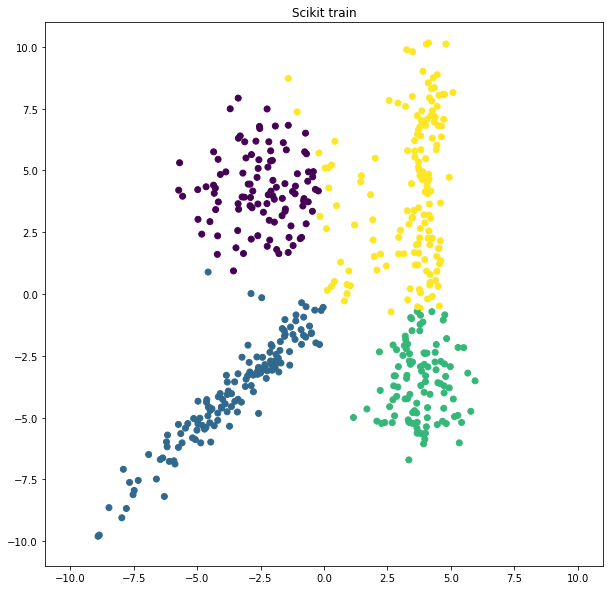

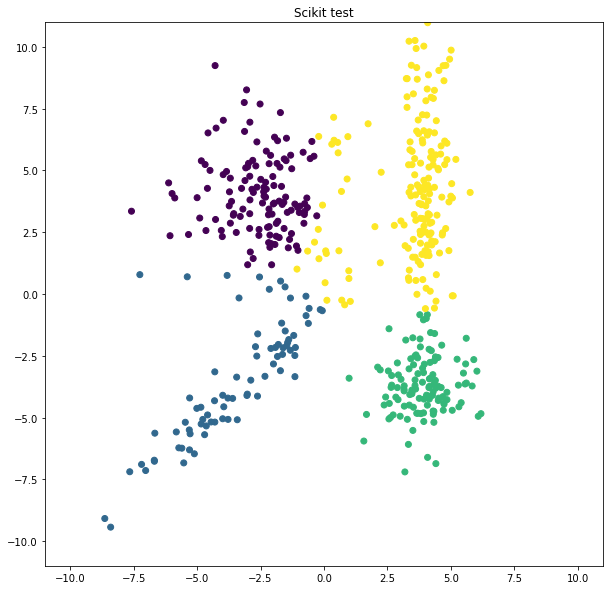

In [60]:
from sklearn import mixture
bmk = mixture.GaussianMixture(
    n_components=4, covariance_type='spherical', 
    tol=0.001, reg_covar=1e-06, max_iter=300, n_init=1, init_params='kmeans'
)

bmk.fit(data.X_train)
plt.figure(figsize=(10, 10))
plt.ylim(-11, 11)
plt.xlim(-11, 11)
plt.scatter(
    data.X_train[:, 0], 
    data.X_train[:, 1], 
    c=bmk.predict(data.X_train),
    cmap=plt.get_cmap('viridis'),
)
plt.title('Scikit train')
plt.show();

plt.figure(figsize=(10, 10))
plt.ylim(-11, 11)
plt.xlim(-11, 11)
plt.scatter(
    data.X_test[:, 0], 
    data.X_test[:, 1], 
    c=bmk.predict(data.X_test),
    cmap=plt.get_cmap('viridis'),
)
plt.title('Scikit test')
plt.show();

# Benchmark Houssam

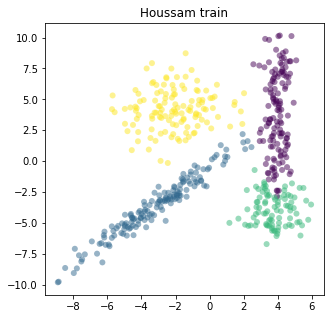

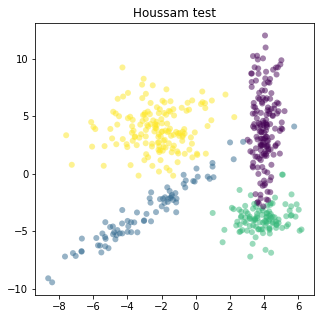

In [40]:
from tools.EMHoussam import my_GMM
GMM = my_GMM(4,'kmeans')
GMM.fit(data.X_train, eps=1e-5)
plt.figure(figsize=(5, 5))
plt.scatter(
    data.X_train[:, 0], 
    data.X_train[:, 1], 
    c=GMM.predict(data.X_train),
    cmap=plt.get_cmap('viridis'),
    edgecolor='none', 
    alpha=0.5
)
plt.title('Houssam train')
plt.show();
plt.figure(figsize=(5, 5))
plt.scatter(
    data.X_test[:, 0], 
    data.X_test[:, 1], 
    c=GMM.predict(data.X_test),
    cmap=plt.get_cmap('viridis'),
    edgecolor='none', 
    alpha=0.5
)
plt.title('Houssam test')
plt.show();